<table style="width: 100%; border: none; background: linear-gradient(to bottom, #f8f9fa, #e9ecef); padding: 30px; border-radius: 10px; box-shadow: 0 2px 5px rgba(0,0,0,0.1);">
    <tr>
        <td style="width: 22%; border: none; vertical-align: middle; text-align: center;">
            <img src="https://www.inf.ucv.cl/wp-content/uploads/2020/05/logo_escuela.jpg" width="170" style="max-width: 100%;">
        </td>
        <td style="width: 56%; border: none; vertical-align: middle; text-align: center; padding: 0 20px;">
            <h1 style="font-size: 28px; color: #1a3b5c; margin-bottom: 16px; border-bottom: 2px solid #1a3b5c; padding-bottom: 8px;">Tarea 2</h1>
            <p style="font-size: 16px; margin: 8px 0;"><strong>Pontificia Universidad Católica de Valparaíso</strong><br>
            <strong>Escuela de Ingeniería Informática</strong></p>
            <p style="font-size: 14px; color: #333; margin: 12px 0;"><strong>ICI3244 Redes Neuronales Profundas / MII910 Deep Learning </strong><br>
            <strong>Trimestre/Semestre: 1-2025</strong><br>
            <strong>Profesor: Carlos Valle</strong><br>
            <strong>Fecha: 6 de Junio de 2025</strong></p>
        </td>
        <td style="width: 22%; border: none; vertical-align: middle; text-align: center;">
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/PUCV_Escudo2016.svg/1200px-PUCV_Escudo2016.svg.png" width="140" style="max-width: 100%;">
        </td>
    </tr>
</table>

### **Temas**

- Comprender la arquitectura de LSTM y GRU
- Preparar datos de series temporales multivariadas
- Implementar y ajustar hiperparámetros de RNNs
- Comparar rendimiento entre LSTM y GRU

---

### **Instrucciones Generales**

- Trabajo en equipos de **2 o 3 personas**
- Entregable: **Jupyter Notebook** subido a un **repositorio privado de GitHub**
- Presentación de resultados: **13 de junio a las 14:30 horas**
- Entrega final: **14 de junio a las 14:30 horas**
- Enviar link de GitHub al correo: <carlos.valle@pucv.cl> (Asunto: [ICI3244/MII910-1-2025 Tarea2])
- Invitar como colaborador al usuario: **cvalle231**

Estructura del notebook:
- Celdas de código con explicaciones claras
- Comentarios en el código
- Visualizaciones
- Interpretación de resultados y justificación de decisiones

Se recomienda utilizar **Google Colab** con **TPU** como acelerador.

---

# (50%) 1. Redes Neuronales Recurrentes

Las redes neuronales recurrentes (RNNs) son un tipo de red neuronal artificial especialmente diseñada para trabajar con datos secuenciales, como texto, series de tiempo o audio. A diferencia de las redes neuronales tradicionales, las RNNs poseen una forma de “memoria” que les permite retener información de pasos anteriores en la secuencia. Esto les permite capturar patrones temporales complejos y realizar predicciones más precisas.


<div align='center'>  
  <img src="https://atmosphere.copernicus.eu/sites/default/files/styles/hero_image_large/public/2024-09/iStock-835810766.jpg?itok=YFy7k9Jc" width="50%" height="50%" />  
</div>

En esta parte de la tarea trabajaremos con datos obtenidos desde una estación meteorológica.


El dataset entregado **"SolarPrediction2.csv"** contiene mediciones meteorológicas de los últimos 4 meses, incluyendo variables como:


- Radiación
- Temperatura
- Presion
- Humedad
- Dirección del viento
- Velocidad del viento
  

El objetivo principal es construir un modelo capaz de predecir el **nivel de radiación solar** para las próximas 24 horas.

# Evaluación

La nota de esta sección se calculará con la siguiente fórmula:

$\left(\frac{\mbox{suma de puntos obtenidos}*6}{85}\right)+1$


## 1.a Carga de datos y preprocesamiento



In [ ]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
sns.set_palette("deep")

### 1.a.1 (1 pt) Carga inicial del dataset.
Cargue el archivo CSV descargado y visualice las primeras filas. Asegúrese de que los datos estén correctamente leídos y que las columnas tengan nombres coherentes.

In [ ]:
# URL del dataset
url = "https://raw.githubusercontent.com/suazo-jara/tarea2-RNP/refs/heads/main/SolarPrediction2.csv"

# Cargar el dataset usando pd.read_csv
df = pd.read_csv(url)

### 1.a.2  (3 pts) Separación en conjuntos de entrenamiento, validación y test.

Divida el conjunto de datos **considerando la dependencia temporal**:

- 70% para entrenamiento

- 20% para validación

- 10% para test

Preserve el orden temporal en la división. Comente brevemente por qué no debe realizarse una división aleatoria en este contexto.

In [ ]:
# Verificar que este ordenado por fecha
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

# División porcentual (por ejemplo: 70% train, 20% val, 10% test)
n = len(df)
train_end = int(n * 0.7)
val_end   = int(n * 0.90)

df_train = df.iloc[:train_end]
df_val   = df.iloc[train_end:val_end]
df_test  = df.iloc[val_end:]

### 1.a.3 (1 pt) Verificación del tamaño de los subconjuntos.
Verifique que las proporciones aproximadas entre los conjuntos de entrenamiento, validación y test sean las correctas.

In [ ]:
# Verifica que tienes aproximadamente 70% train, 20% validation, 10% test
total = len(df)
train_pct = len(df_train) / total * 100
val_pct = len(df_val) / total * 100
test_pct = len(df_test) / total * 100

print(f"Train: {len(df_train)} muestras, {train_pct:.2f}%")
print(f"Validación: {len(df_val)} muestras, {val_pct:.2f}%")
print(f"Test: {len(df_test)} muestras, {test_pct:.2f}%")

Train: 2015 muestras, 69.97%
Validación: 577 muestras, 20.03%
Test: 288 muestras, 10.00%


## 1.a.4 (4 pt) Transformar la variable timestamp de cada conjunto (train, val, test) en componentes cíclicas hour_sin y hour_cos.

Estas variables representan la hora del día en formato seno y coseno, respectivamente, y se utilizarán como entradas del modelo para capturar de forma continua la estacionalidad diaria.

In [ ]:
# Función auxiliar para añadir las componentes horarias
def add_hour_cyclic_features(df):
    df = df.copy()
    df['hour'] = df['timestamp'].dt.hour
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df.drop(columns=['hour'], inplace=True)
    return df

# Aplicar a cada conjunto
df_train = add_hour_cyclic_features(df_train)
df_val = add_hour_cyclic_features(df_val)
df_test = add_hour_cyclic_features(df_test)

df_train.describe(include='all')

,timestamp,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,hour_sin,hour_cos
count,2015,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2.015000e+03,2.015000e+03
mean,2016-10-13 22:59:59.999999744,303.875993,53.385856,30.442568,77.469727,215.171801,9.567514,1.284462e-04,-4.793677e-04
min,2016-09-02 00:00:00,1.210000,41.000000,30.340000,14.000000,1.880000,1.120000,-1.000000e+00,-1.000000e+00
25%,2016-09-22 23:30:00,1.260000,48.000000,30.420000,60.000000,168.895000,7.870000,-7.071068e-01,-7.071068e-01
50%,2016-10-13 23:00:00,17.230000,52.000000,30.440000,88.000000,186.050000,9.000000,1.224647e-16,-1.836970e-16
75%,2016-11-03 22:30:00,633.640000,58.000000,30.470000,99.000000,283.090000,11.250000,7.071068e-01,7.071068e-01
max,2016-11-24 22:00:00,1601.260000,71.000000,30.540000,103.000000,359.950000,27.000000,1.000000e+00,1.000000e+00
std,NaN,397.236999,6.167209,0.032750,25.290802,83.098963,3.024288,7.074343e-01,7.071301e-01


### 1.a.5 (3 pts) Escalado de variables.

Realice el escalado de las variables predictoras para los tres conjuntos (train, val, test) de forma que:

- El scaler se ajuste **exclusivamente con los datos de entrenamiento**, para evitar data leakage.

- Aplique el mismo scaler a los demás conjuntos.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Variables de entrada (X) y salida (y)
feature_cols = ['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'hour_sin', 'hour_cos']
target_col = 'Radiation'

# Inicializar los escaladores
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Ajustar solo con datos de entrenamiento
scaler_X.fit(df_train[feature_cols])
scaler_y.fit(df_train[[target_col]])

# Copias escaladas de los dataframes
df_train_scaled = df_train.copy()
df_val_scaled   = df_val.copy()
df_test_scaled  = df_test.copy()

# Aplicar la transformación
df_train_scaled[feature_cols] = scaler_X.transform(df_train[feature_cols])
df_val_scaled[feature_cols]   = scaler_X.transform(df_val[feature_cols])
df_test_scaled[feature_cols]  = scaler_X.transform(df_test[feature_cols])

df_train_scaled[[target_col]] = scaler_y.transform(df_train[[target_col]])
df_val_scaled[[target_col]]   = scaler_y.transform(df_val[[target_col]])
df_test_scaled[[target_col]]  = scaler_y.transform(df_test[[target_col]])

### 1.a.5 (4 pts) Preparación de secuencias

Para predecir la radiación solar de las próximas 24 horas, utilice la función split_sequence_valid() para generar las variables de entrada (X) y salida (y).


In [ ]:
def create_multistep_sequences(df, feature_cols, target_col='Radiation',
                              input_window=24, output_window=24):
    X, y = [], []
    idx = df.index

    for i in range(len(df) - input_window - output_window + 1):
        expected = pd.date_range(start=idx[i], periods=input_window + output_window, freq='1h')
        actual = idx[i:i + input_window + output_window]

        if all(expected == actual):
            X.append(df.iloc[i:i + input_window][feature_cols].values)
            y.append(df.iloc[i + input_window : i + input_window + output_window][target_col].values)

    return np.array(X), np.array(y)

In [ ]:
# Asegurar índice datetime
df_train_scaled = df_train_scaled.set_index('timestamp').sort_index()
df_val_scaled = df_val_scaled.set_index('timestamp').sort_index()
df_test_scaled = df_test_scaled.set_index('timestamp').sort_index()

df_train_scaled = df_train_scaled.asfreq('1h').interpolate()
df_val_scaled = df_val_scaled.asfreq('1h').interpolate()
df_test_scaled = df_test_scaled.asfreq('1h').interpolate()

X_train_seq, y_train_seq = create_multistep_sequences(df_train_scaled, feature_cols, target_col)

X_val_seq, y_val_seq = create_multistep_sequences(df_val_scaled, feature_cols, target_col)
X_test_seq, y_test_seq = create_multistep_sequences(df_test_scaled, feature_cols, target_col)

print(X_train_seq.shape)  # (n_samples, 24, n_features)
print(y_train_seq.shape)  # (n_samples, 24)

(1968, 24, 7)
(1968, 24)


## 1.b Función para evaluar modelos y medir errores

### 1.b.1 (1 pts) Importación de librerías
Implemente las importaciones necesarias para trabajar con modelos de redes neuronales recurrentes. Estas deben incluir:

- Bibliotecas de Keras/TensorFlow para construcción de modelos secuenciales y capas LSTM, GRU.

- Herramientas para entrenamiento, callbacks, métricas y visualización.

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, activations, optimizers, regularizers, callbacks, metrics
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import History, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l1, l2

# Verificar versión y dispositivos disponibles
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU disponible: {tf.config.list_physical_devices('GPU')}")

TensorFlow version: 2.19.0
GPU disponible: []


### 1.b.2 (5 pts) Función de evaluación

Implemente una función que permita evaluar los modelos en la escala original de los datos. Para ello:

- Invierta la transformación del scaler sobre las predicciones y el conjunto de prueba.

- Calcule el MSE entre los valores reales y predichos en su escala natural.

Esta función será usada más adelante para comparar modelos con diferentes configuraciones.

In [ ]:
from sklearn.metrics import mean_squared_error

def calculate_original_mse(y_true_scaled, y_pred_scaled, scaler):
    """
    Calcula el MSE en la escala original de los datos.

    Parámetros:
    y_true_scaled: valores reales escalados
    y_pred_scaled: valores predichos escalados
    scaler: objeto StandardScaler utilizado para escalar la variable objetivo

    Retorna:
    MSE en la escala original
    """
    # Invertir la transformación para volver a la escala original
    y_true = scaler.inverse_transform(y_true_scaled)
    y_pred = scaler.inverse_transform(y_pred_scaled)

    # Calcular y retornar el MSE en escala original
    mse = mean_squared_error(y_true, y_pred)
    return mse

## 1.c Búsqueda de hiperparámetros óptimos

### 1.c.1  (10 pts) Defina una función para entrenar y evaluar redes neuronales LSTM con diferentes arquitecturas e hiperparámetros.

**La función debe considerar únicamente dos capas LSTM y una capa densa intermedia.**

In [ ]:
def create_lstm_model(input_shape, output_dim, activation='tanh', lstm_units=[50, 30],
                      dense_units=25, initializer='glorot_uniform', dropout_rate=0.2,
                      regularizer=None):

    # Crear arquitectura
    model = Sequential()

    # Entrada explícita
    model.add(Input(shape=input_shape))

    # 1ra capa LSTM (devuelve secuencia para la siguiente)
    model.add(LSTM(
        units=lstm_units[0],
        activation=activation,
        return_sequences=True,
        kernel_initializer=initializer,
        kernel_regularizer=regularizer
    ))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    # 2da capa LSTM (última, no devuelve secuencia)
    model.add(LSTM(
        units=lstm_units[1],
        activation=activation,
        return_sequences=False,
        kernel_initializer=initializer,
        kernel_regularizer=regularizer
    ))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    # Capa densa intermedia
    model.add(Dense(
        units=dense_units,
        activation='relu',
        kernel_initializer=initializer,
        kernel_regularizer=regularizer
    ))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    # Capa de salida
    model.add(Dense(units=output_dim))

    return model

def train_evaluate_lstm_model(X_train, y_train, X_val, y_val, X_test, y_test,
                              input_shape, output_dim, scaler,
                              activation='tanh', depth=2, lstm_units=[50, 30], dense_units=25, learning_rate=0.001,
                              optimizer_name='Adam', batch_size=32, initializer='glorot_uniform',
                              dropout_rate=0.2, regularizer_type=None, regularizer_lambda=0.0,
                              epochs=500, patience=50):
    """
    Entrena y evalúa una red LSTM con los hiperparámetros especificados.

    Parámetros:
        X_train, y_train: datos de entrenamiento
        X_val, y_val: datos de validación
        X_test, y_test: datos de prueba
        input_shape: tuple, forma de entrada (timesteps, features)
        output_dim: int, dimensión de salida
        activation: función de activación ('relu', 'sigmoid', 'tanh')
        depth: int, número de capas LSTM
        lstm_units: Lista con unidades para cada capa LSTM
        dense_units: Unidades en capa densa final
        learning_rate: float, tasa de aprendizaje
        optimizer_name: str, optimizador ('SGD', 'Adam', etc.)
        batch_size: int
        initializer: str, inicializador de pesos
        dropout_rate: float, tasa de dropout
        regularizer_type: str, tipo de regularización (None, 'l1', 'l2')
        regularizer_lambda: float
        epochs: int, número máximo de épocas
        patience: int, paciencia para early stopping

    Retorna:
        model: modelo entrenado
        history: historial de entrenamiento
        val_loss: pérdida mínima en validación
        test_loss: pérdida en test (escala normalizada)
        test_loss_original: pérdida en test (escala original, si corresponde)
    """

    # 1. Configurar regularizador y optimizador
    if regularizer_type == 'l1':
        regularizer = l1(regularizer_lambda)
    elif regularizer_type == 'l2':
        regularizer = l2(regularizer_lambda)
    else:
        regularizer = None

    if optimizer_name == 'Adam':
        optimizer = optimizers.Adam(learning_rate=learning_rate)

    # 2. Crear arquitectura con create_lstm_model()
    model = create_lstm_model(
        input_shape=input_shape,
        output_dim=output_dim,
        activation=activation,
        lstm_units=lstm_units,
        dense_units=dense_units,
        initializer=initializer,
        dropout_rate=dropout_rate,
        regularizer=regularizer
    )

    # 3. Compilar modelo
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    # 4. Entrenar usando early stopping
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=patience,
        restore_best_weights=True,
        verbose=1)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=1
    )

    # 5. Evaluar en conjunto de prueba (calculate_original_mse())
    val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
    y_pred_scaled = model.predict(X_test)

    test_loss_original = calculate_original_mse(y_test, y_pred_scaled, scaler)

    # 7. Retornar resultados
    return model, history, val_loss, test_loss, test_loss_original

### 1.c.2 (2 pts) Defina los espacios de búsqueda para cada hiperparámetro.

In [ ]:
# Definir los espacios de búsqueda para autotuning
activations = ['relu', 'tanh']
neurons_list_lstm_1 = [16, 32, 64, 96, 128]       # Neuronas por capa
neurons_list_lstm_2 = [16, 32, 64, 96, 128]       # Neuronas por capa
neurons_list_dense = [16, 32, 64, 96, 128]        # Neuronas por capa
learning_rates = [0.0001, 0.0005, 0.001, 0.005, 0.01]       # Tasas de aprendizaje
dropout_rates = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]           # Tasas de dropout a probar
regularizer_types = [None, 'l1', 'l2']    # Tipos de regularización
regularizer_lambdas = [0.0, 0.001, 0.01]  # Lambda de regularización

# Parámetros fijos para la búsqueda inicial
fixed_batch_size = 32
fixed_initializer = 'glorot_uniform'
fixed_optimizer = 'Adam'
fixed_patience = 50

# Estructuras para almacenar resultados
results_lstm = []
best_val_loss_lstm = float('inf')
best_params_lstm = {}
best_test_loss_lstm = float('inf')
best_test_loss_original_lstm = float('inf')

### 1.c.3  (10 pts) Realice una búsqueda sistemática de hiperparámetros usando un número limitado de trials aleatorios.

In [ ]:
import random

# Definir el número de trials (experimentos)
num_trials = 20  # Ajustar según tiempo disponible

print(f"Realizando búsqueda de hiperparámetros con {num_trials} trials aleatorios")

# Implementar la búsqueda aleatoria de hiperparámetros
input_shape = X_train_seq.shape[1:]  # (timesteps, features)
output_dim = 24
#output_dim = 1  # predicción escalar

for trial in range(1, num_trials + 1):
    print("=" * 60)
    print(f"TRIAL {trial}/{num_trials}")

    # Seleccionar aleatoriamente una combinación
    activation = random.choice(activations)
    lstm_1 = random.choice(neurons_list_lstm_1)
    lstm_2 = random.choice(neurons_list_lstm_2)
    dense = random.choice(neurons_list_dense)
    lr = random.choice(learning_rates)
    dropout = random.choice(dropout_rates)
    reg_type = random.choice(regularizer_types)
    reg_lambda = random.choice(regularizer_lambdas)

    # Usar train_evaluate_model para cada combinación seleccionada
    model, history, val_loss, test_loss, test_loss_original = train_evaluate_lstm_model(
        X_train=X_train_seq, y_train=y_train_seq,
        X_val=X_val_seq, y_val=y_val_seq,
        X_test=X_test_seq, y_test=y_test_seq,
        input_shape=input_shape, output_dim=output_dim,
        scaler=scaler_y,
        activation=activation,
        lstm_units=[lstm_1, lstm_2],
        dense_units=dense,
        learning_rate=lr,
        optimizer_name=fixed_optimizer,
        batch_size=fixed_batch_size,
        initializer=fixed_initializer,
        dropout_rate=dropout,
        regularizer_type=reg_type,
        regularizer_lambda=reg_lambda,
        epochs=100,
        patience=fixed_patience
    )

    # Guardar resultados
    config = {
        'activation': activation,
        'lstm_units': [lstm_1, lstm_2],
        'dense_units': dense,
        'learning_rate': lr,
        'dropout_rate': dropout,
        'regularizer_type': reg_type,
        'regularizer_lambda': reg_lambda,
        'val_loss': val_loss,
        'test_loss': test_loss,
        'test_loss_original': test_loss_original,
        'history': history
    }
    results_lstm.append(config)

    # Almacenar resultados y actualizar el mejor modelo
    if val_loss < best_val_loss_lstm:
        best_val_loss_lstm = val_loss
        best_params_lstm = config
        best_model_lstm = model
        best_test_loss_lstm = test_loss
        best_test_loss_original_lstm = test_loss_original

Realizando búsqueda de hiperparámetros con 20 trials aleatorios
TRIAL 1/20
Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 1.2763 - mae: 0.7130 - val_loss: 0.7624 - val_mae: 0.5376
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.4650 - mae: 0.3672 - val_loss: 0.5453 - val_mae: 0.4260
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.3476 - mae: 0.3101 - val_loss: 0.5827 - val_mae: 0.4402
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2924 - mae: 0.2916 - val_loss: 0.5876 - val_mae: 0.4486
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2783 - mae: 0.2920 - val_loss: 0.6017 - val_mae: 0.4627
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2623 - mae: 0.2883 - val_loss: 0.7200 - val_mae: 0.5224
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2428 - mae: 0.2820 - val_loss: 0.6554 - val_mae: 0.4910
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.2325 - mae: 0.2781 - val_loss: 0.4856

### 1.c.4 (5 pts) Analice los resultados y determine la mejor combinación de hiperparámetros.

Top 5 mejores modelos (por val_loss):

Modelo 1
  - Activación: tanh
  - LSTM units: [128, 16]
  - Dense units: 16
  - LR: 0.001
  - Dropout: 0.5
  - Reg: l2 (λ=0.0)
  - Val loss: 0.3531
  - Test loss: 0.1458
  - Test loss original: 22992.4889
--------------------------------------------------
Modelo 2
  - Activación: tanh
  - LSTM units: [16, 128]
  - Dense units: 32
  - LR: 0.0005
  - Dropout: 0.3
  - Reg: None (λ=0.001)
  - Val loss: 0.3676
  - Test loss: 0.1468
  - Test loss original: 23159.4602
--------------------------------------------------
Modelo 3
  - Activación: tanh
  - LSTM units: [128, 64]
  - Dense units: 16
  - LR: 0.001
  - Dropout: 0.2
  - Reg: None (λ=0.01)
  - Val loss: 0.3709
  - Test loss: 0.0738
  - Test loss original: 11635.0863
--------------------------------------------------
Modelo 4
  - Activación: relu
  - LSTM units: [64, 64]
  - Dense units: 32
  - LR: 0.01
  - Dropout: 0.2
  - Reg: l1 (λ=0.0)
  - Val loss: 0.3717
  - Test loss: 0.0753
  - Test loss ori

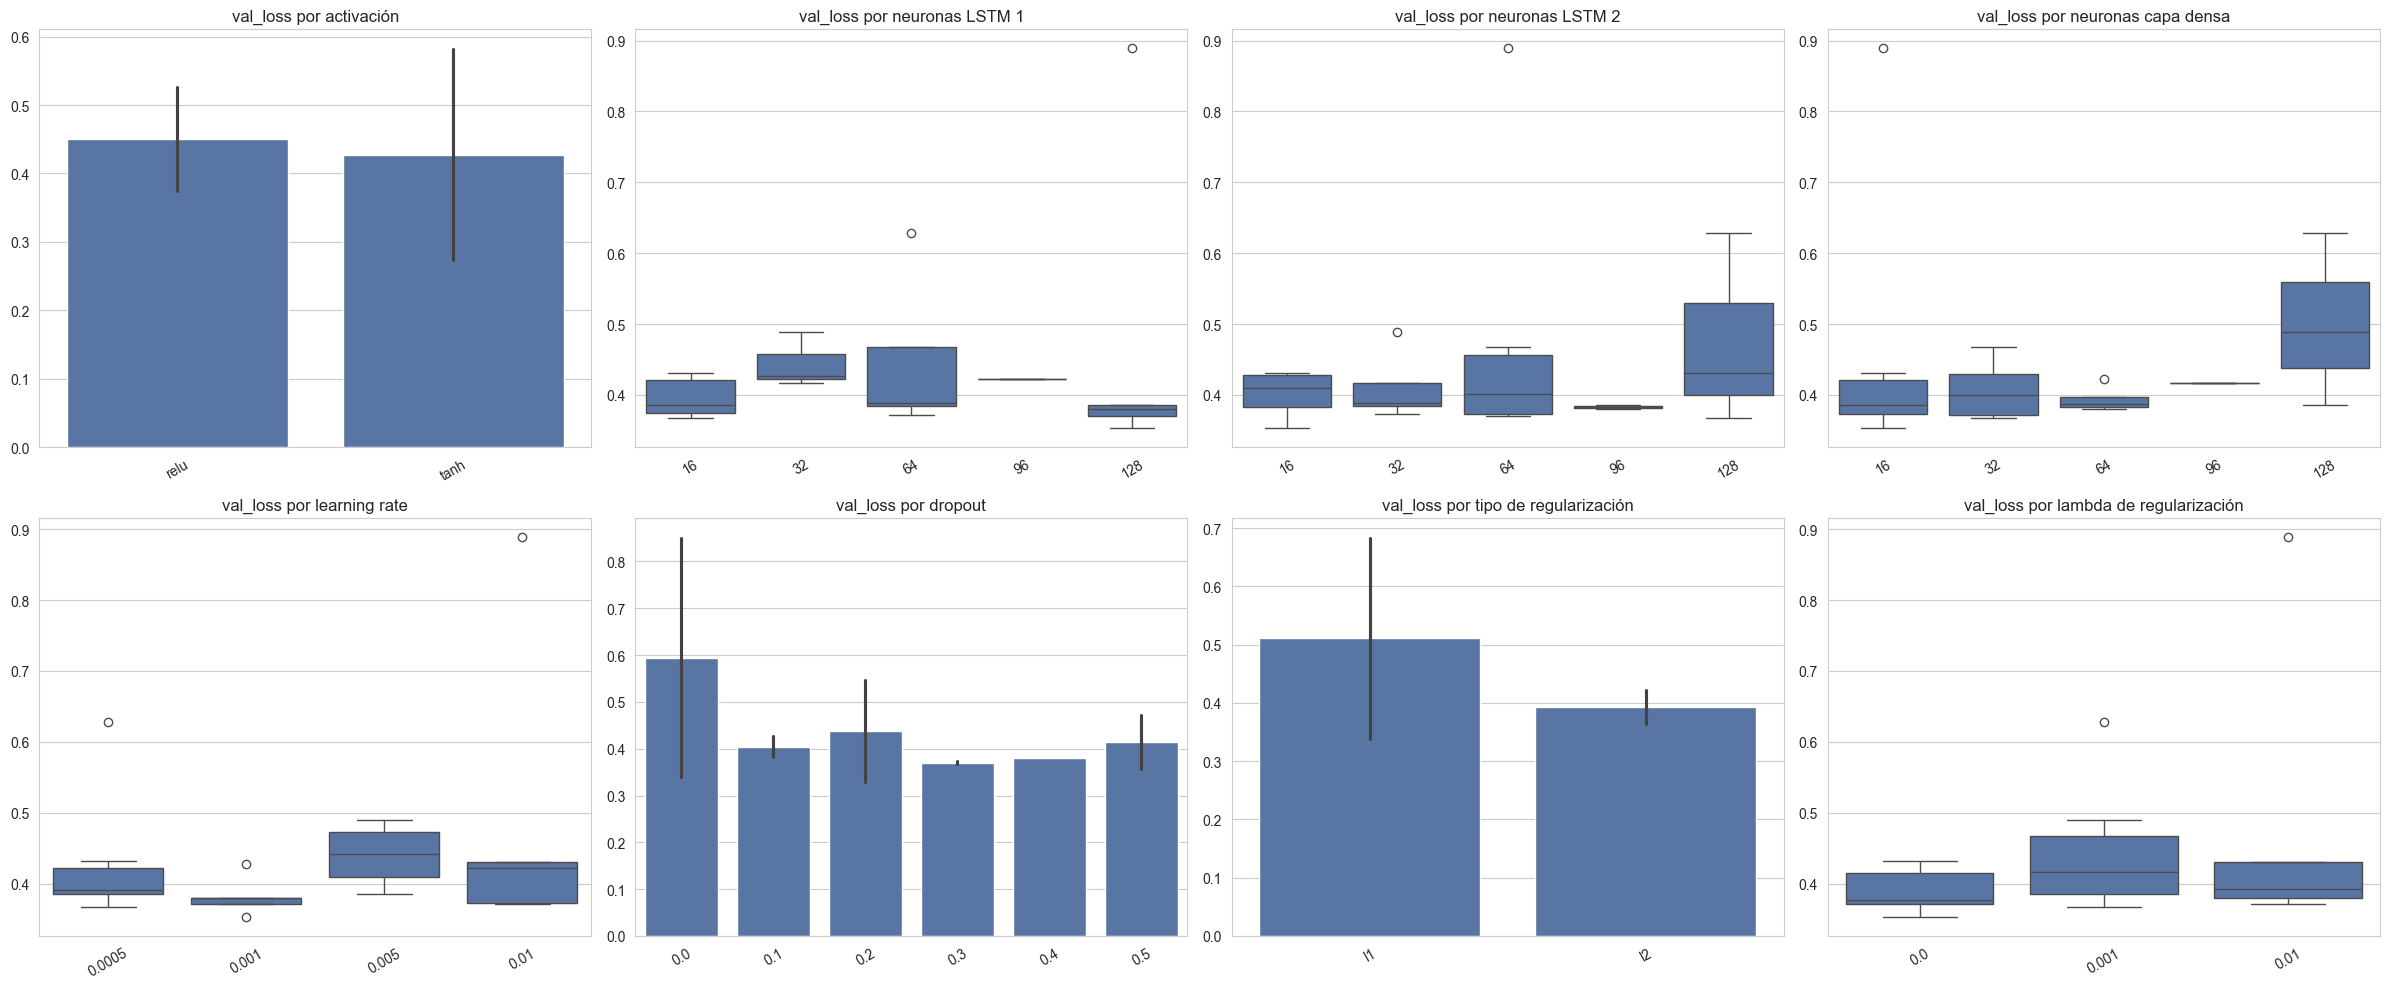

In [ ]:
# Ordenar resultados por error de validación
sorted_results = sorted(results_lstm, key=lambda x: x['val_loss'])

# Mostrar los mejores modelos
print("Top 5 mejores modelos (por val_loss):\n")
for i, res in enumerate(sorted_results[:5]):
    print(f"Modelo {i+1}")
    print(f"  - Activación: {res['activation']}")
    print(f"  - LSTM units: {res['lstm_units']}")
    print(f"  - Dense units: {res['dense_units']}")
    print(f"  - LR: {res['learning_rate']}")
    print(f"  - Dropout: {res['dropout_rate']}")
    print(f"  - Reg: {res['regularizer_type']} (λ={res['regularizer_lambda']})")
    print(f"  - Val loss: {res['val_loss']:.4f}")
    print(f"  - Test loss: {res['test_loss']:.4f}")
    print(f"  - Test loss original: {res['test_loss_original']:.4f}")
    print("-" * 50)

# Analizar tendencias por hiperparámetro
df_results = pd.DataFrame(results_lstm)

# Separar lstm_units[0] y lstm_units[1] en columnas propias
df_results['lstm_1'] = df_results['lstm_units'].apply(lambda x: x[0])
df_results['lstm_2'] = df_results['lstm_units'].apply(lambda x: x[1])

fig, axes = plt.subplots(2, 4, figsize=(24, 10))  # 2 filas, 4 columnas

# Acceso plano a los ejes
axes = axes.flatten()

# Gráfico 1: Activación
sns.barplot(data=df_results, x='activation', y='val_loss', ax=axes[0], errorbar='sd')
axes[0].set_title('val_loss por activación')
axes[0].set_ylabel('val_loss (MSE)')

# Gráfico 2: LSTM capa 1
sns.boxplot(data=df_results, x='lstm_1', y='val_loss', ax=axes[1])
axes[1].set_title('val_loss por neuronas LSTM 1')

# Gráfico 3: LSTM capa 2
sns.boxplot(data=df_results, x='lstm_2', y='val_loss', ax=axes[2])
axes[2].set_title('val_loss por neuronas LSTM 2')

# Gráfico 4: Capa densa
sns.boxplot(data=df_results, x='dense_units', y='val_loss', ax=axes[3])
axes[3].set_title('val_loss por neuronas capa densa')

# Gráfico 5: Learning rate
sns.boxplot(data=df_results, x='learning_rate', y='val_loss', ax=axes[4])
axes[4].set_title('val_loss por learning rate')

# Gráfico 6: Dropout
sns.barplot(data=df_results, x='dropout_rate', y='val_loss', ax=axes[5], errorbar='sd')
axes[5].set_title('val_loss por dropout')

# Gráfico 7: Regularizador
sns.barplot(data=df_results, x='regularizer_type', y='val_loss', ax=axes[6], errorbar='sd')
axes[6].set_title('val_loss por tipo de regularización')

# Gráfico 8: Lambda
sns.boxplot(data=df_results, x='regularizer_lambda', y='val_loss', ax=axes[7])
axes[7].set_title('val_loss por lambda de regularización')

# Ajuste final
for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

### 1.c.5 (5 pts) Visualice el proceso de entrenamiento del mejor modelo encontrado.

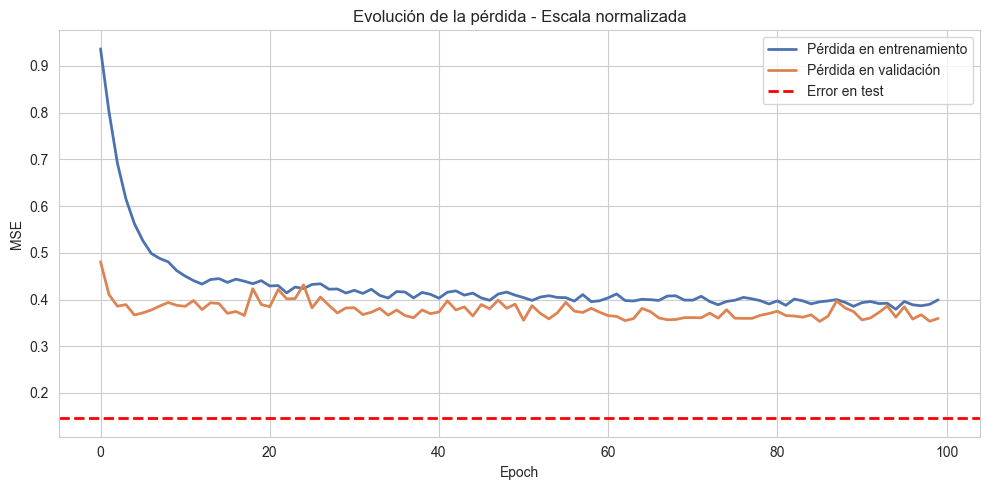

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


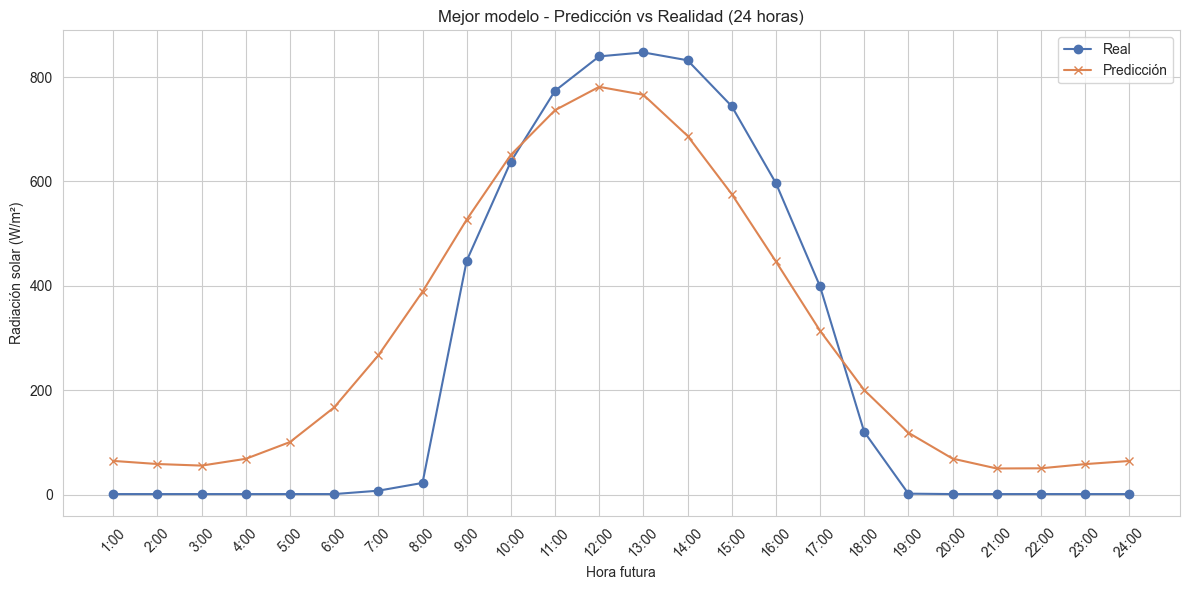

     Hora  Radiación real  Radiación predicha
0    1:00            1.24           64.760002
1    2:00            1.25           58.790001
2    3:00            1.25           55.779999
3    4:00            1.24           68.830002
4    5:00            1.26          100.900002
5    6:00            1.24          167.259995
6    7:00            7.71          266.859985
7    8:00           22.60          388.850006
8    9:00          448.04          526.859985
9   10:00          638.02          650.869995
10  11:00          773.58          736.469971
11  12:00          839.53          781.179993
12  13:00          847.11          765.960022
13  14:00          832.06          687.380005
14  15:00          744.19          575.869995
15  16:00          596.93          446.850006
16  17:00          399.01          314.140015
17  18:00          120.50          200.490005
18  19:00            2.03          118.779999
19  20:00            1.26           69.180000
20  21:00            1.24         

In [ ]:
# Obtener el historial del mejor modelo
history = best_params_lstm['history'].history

# Graficar evolución de loss y val_loss
test_loss = best_params_lstm['test_loss']

plt.figure(figsize=(10, 5))
plt.plot(history['loss'], label='Pérdida en entrenamiento', linewidth=2)
plt.plot(history['val_loss'], label='Pérdida en validación', linewidth=2)
plt.axhline(y=test_loss, color='red', linestyle='--', label='Error en test', linewidth=2)

plt.title('Evolución de la pérdida - Escala normalizada')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Obtener predicciones en escala normalizada
y_pred_best_scaled = best_model_lstm.predict(X_test_seq)

y_pred_best = scaler_y.inverse_transform(y_pred_best_scaled)
y_test_real = scaler_y.inverse_transform(y_test_seq)

# Elegir la muestra a visualizar
i = 10

# Datos reales y predichos para esa muestra
pred = y_pred_best[i]
real = y_test_real[i]

horas = [f'{h}:00' for h in range(1, 25)]

plt.figure(figsize=(12, 6))
plt.plot(horas, real, label='Real', marker='o')
plt.plot(horas, pred, label='Predicción', marker='x')
plt.title('Mejor modelo - Predicción vs Realidad (24 horas)')
plt.xlabel('Hora futura')
plt.ylabel('Radiación solar (W/m²)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Tabla comparativa
df_comparacion = pd.DataFrame({
    'Hora': horas,
    'Radiación real': np.round(real, 2),
    'Radiación predicha': np.round(pred, 2)
})
print(df_comparacion)

### 1.d.1 (10 pts) Defina una función para entrenar y evaluar redes neuronales GRU con diferentes arquitecturas e hiperparámetros.
**La función debe considerar únicamente dos capas GRU y una capa densa intermedia.**

In [ ]:
def create_gru_model(input_shape, output_dim, activation='tanh', gru_units=[50, 30],
                      dense_units=25, initializer='glorot_uniform', dropout_rate=0.2,
                      regularizer=None):

    # Crear arquitectura
    model = Sequential()

    # Entrada explícita
    model.add(Input(shape=input_shape))

    # 1ra capa GRU
    model.add(LSTM(
        units=gru_units[0],
        activation=activation,
        return_sequences=True,
        kernel_initializer=initializer,
        kernel_regularizer=regularizer
    ))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    # 2da capa GRU
    model.add(GRU(
        units=gru_units[1],
        activation=activation,
        return_sequences=False,
        kernel_initializer=initializer,
        kernel_regularizer=regularizer
    ))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    # Capa densa intermedia
    model.add(Dense(
        units=dense_units,
        activation='relu',
        kernel_initializer=initializer,
        kernel_regularizer=regularizer
    ))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    # Capa de salida
    model.add(Dense(units=output_dim))

    return model

def train_evaluate_GRU_model(X_train, y_train, X_val, y_val, X_test, y_test,
                              input_shape, output_dim, scaler,
                              activation='tanh', depth=2, gru_units=[50, 30], dense_units=25, learning_rate=0.001,
                              optimizer_name='Adam', batch_size=32, initializer='glorot_uniform',
                              dropout_rate=0.2, regularizer_type=None, regularizer_lambda=0.0,
                              epochs=500, patience=50):
    """
    Entrena y evalúa una red LSTM con los hiperparámetros especificados.

    Parámetros:
        X_train, y_train: datos de entrenamiento
        X_val, y_val: datos de validación
        X_test, y_test: datos de prueba
        input_shape: tuple, forma de entrada (timesteps, features)
        output_dim: int, dimensión de salida
        activation: función de activación ('relu', 'sigmoid', 'tanh')
        depth: int, número de capas LSTM
        gru_units: Lista con unidades para cada capa LSTM
        dense_units: Unidades en capa densa final
        learning_rate: float, tasa de aprendizaje
        optimizer_name: str, optimizador ('SGD', 'Adam', etc.)
        batch_size: int
        initializer: str, inicializador de pesos
        dropout_rate: float, tasa de dropout
        regularizer_type: str, tipo de regularización (None, 'l1', 'l2')
        regularizer_lambda: float
        epochs: int, número máximo de épocas
        patience: int, paciencia para early stopping

    Retorna:
        model: modelo entrenado
        history: historial de entrenamiento
        val_loss: pérdida mínima en validación
        test_loss: pérdida en test (escala normalizada)
        test_loss_original: pérdida en test (escala original, si corresponde)
    """

    # 1. Configurar regularizador y optimizador
    if regularizer_type == 'l1':
        regularizer = l1(regularizer_lambda)
    elif regularizer_type == 'l2':
        regularizer = l2(regularizer_lambda)
    else:
        regularizer = None

    if optimizer_name == 'Adam':
        optimizer = optimizers.Adam(learning_rate=learning_rate)

    # 2. Crear arquitectura con create_gru_model()
    model = create_gru_model(
        input_shape=input_shape,
        output_dim=output_dim,
        activation=activation,
        gru_units=gru_units,
        dense_units=dense_units,
        initializer=initializer,
        dropout_rate=dropout_rate,
        regularizer=regularizer
    )

    # 3. Compilar modelo
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    # 4. Entrenar usando early stopping
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=patience,
        restore_best_weights=True,
        verbose=1)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stop],
        verbose=1
    )

    # 5. Evaluar en conjunto de prueba (calculate_original_mse())
    val_loss, val_mae = model.evaluate(X_val, y_val, verbose=0)
    test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
    y_pred_scaled = model.predict(X_test)

    test_loss_original = calculate_original_mse(y_test, y_pred_scaled, scaler)

    # 7. Retornar resultados
    return model, history, val_loss, test_loss, test_loss_original

### 1.d.2 (2 pts) Defina los espacios de búsqueda para cada hiperparámetro.

In [ ]:
# Definir los espacios de búsqueda para autotuning
activations = ['relu', 'tanh']
neurons_list_gru_1 = [16, 32, 64, 96, 128]       # Neuronas por capa
neurons_list_gru_2 = [16, 32, 64, 96, 128]       # Neuronas por capa
neurons_list_dense = [16, 32, 64, 96, 128]        # Neuronas por capa
learning_rates = [0.0001, 0.0005, 0.001, 0.005, 0.01]       # Tasas de aprendizaje
dropout_rates = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]           # Tasas de dropout a probar
regularizer_types = [None, 'l1', 'l2']    # Tipos de regularización
regularizer_lambdas = [0.0, 0.001, 0.01]  # Lambda de regularización

# Parámetros fijos para la búsqueda inicial
fixed_batch_size = 32
fixed_initializer = 'glorot_uniform'
fixed_optimizer = 'Adam'
fixed_patience = 50

# Estructuras para almacenar resultados
results_gru = []
best_val_loss_gru = float('inf')
best_params_gru = {}
best_test_loss_gru = float('inf')
best_test_loss_original_gru = float('inf')

### 1.d.3 (10 pts) Realice una búsqueda sistemática de hiperparámetros usando un número limitado de trials aleatorios.

In [ ]:
import random

# Definir el número de trials (experimentos)
num_trials = 20  # Ajustar según tiempo disponible

print(f"Realizando búsqueda de hiperparámetros con {num_trials} trials aleatorios")

# Implementar la búsqueda aleatoria de hiperparámetros
input_shape = X_train_seq.shape[1:]  # (timesteps, features)
output_dim = 24
#output_dim = 1  # predicción escalar

for trial in range(1, num_trials + 1):
    print("=" * 60)
    print(f"TRIAL {trial}/{num_trials}")

    # Seleccionar aleatoriamente una combinación
    activation = random.choice(activations)
    gru_1 = random.choice(neurons_list_gru_1)
    gru_2 = random.choice(neurons_list_gru_2)
    dense = random.choice(neurons_list_dense)
    lr = random.choice(learning_rates)
    dropout = random.choice(dropout_rates)
    reg_type = random.choice(regularizer_types)
    reg_lambda = random.choice(regularizer_lambdas)

    # Usar train_evaluate_model para cada combinación seleccionada
    model, history, val_loss, test_loss, test_loss_original = train_evaluate_GRU_model(
        X_train=X_train_seq, y_train=y_train_seq,
        X_val=X_val_seq, y_val=y_val_seq,
        X_test=X_test_seq, y_test=y_test_seq,
        input_shape=input_shape, output_dim=output_dim,
        scaler=scaler_y,
        activation=activation,
        gru_units=[gru_1, gru_2],
        dense_units=dense,
        learning_rate=lr,
        optimizer_name=fixed_optimizer,
        batch_size=fixed_batch_size,
        initializer=fixed_initializer,
        dropout_rate=dropout,
        regularizer_type=reg_type,
        regularizer_lambda=reg_lambda,
        epochs=100,
        patience=fixed_patience
    )

    # Guardar resultados
    config = {
        'activation': activation,
        'gru_units': [gru_1, gru_2],
        'dense_units': dense,
        'learning_rate': lr,
        'dropout_rate': dropout,
        'regularizer_type': reg_type,
        'regularizer_lambda': reg_lambda,
        'val_loss': val_loss,
        'test_loss': test_loss,
        'test_loss_original': test_loss_original,
        'history': history
    }
    results_gru.append(config)

    # Almacenar resultados y actualizar el mejor modelo
    if val_loss < best_val_loss_gru:
        best_val_loss_gru = val_loss
        best_params_gru = config
        best_model_gru = model
        best_test_loss_gru = test_loss
        best_test_loss_original_gru = test_loss_original

Realizando búsqueda de hiperparámetros con 20 trials aleatorios
TRIAL 1/20
Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 2.3385 - mae: 0.8093 - val_loss: 1.2930 - val_mae: 0.5922
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.8661 - mae: 0.4343 - val_loss: 0.7055 - val_mae: 0.4483
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.4760 - mae: 0.3566 - val_loss: 0.7149 - val_mae: 0.4890
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.3383 - mae: 0.3261 - val_loss: 0.6975 - val_mae: 0.5126
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2743 - mae: 0.3120 - val_loss: 0.7455 - val_mae: 0.5285
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2445 - mae: 0.3021 - val_loss: 0.5888 - val_mae: 0.4713
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.2307 - mae: 0.2998 - val_loss: 0.6517 - val_mae: 0.5009
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2132 - mae: 0.2931 - val_loss: 0.4940

###1.d.4 (5 pts) Analice los resultados y determine la mejor combinación de hiperparámetros.

Top 5 mejores modelos (por val_loss):

Modelo 1
  - Activación: tanh
  - GRU units: [96, 16]
  - Dense units: 64
  - LR: 0.01
  - Dropout: 0.3
  - Reg: l2 (λ=0.0)
  - Val loss: 0.3281
  - Test loss: 0.0964
  - Test loss original: 15207.2519
--------------------------------------------------
Modelo 2
  - Activación: tanh
  - GRU units: [64, 96]
  - Dense units: 96
  - LR: 0.005
  - Dropout: 0.4
  - Reg: l2 (λ=0.0)
  - Val loss: 0.3371
  - Test loss: 0.0668
  - Test loss original: 10538.4495
--------------------------------------------------
Modelo 3
  - Activación: tanh
  - GRU units: [64, 96]
  - Dense units: 128
  - LR: 0.01
  - Dropout: 0.5
  - Reg: l2 (λ=0.0)
  - Val loss: 0.3429
  - Test loss: 0.0713
  - Test loss original: 11252.0926
--------------------------------------------------
Modelo 4
  - Activación: tanh
  - GRU units: [96, 64]
  - Dense units: 128
  - LR: 0.01
  - Dropout: 0.1
  - Reg: l2 (λ=0.001)
  - Val loss: 0.3453
  - Test loss: 0.0856
  - Test loss original: 10931.

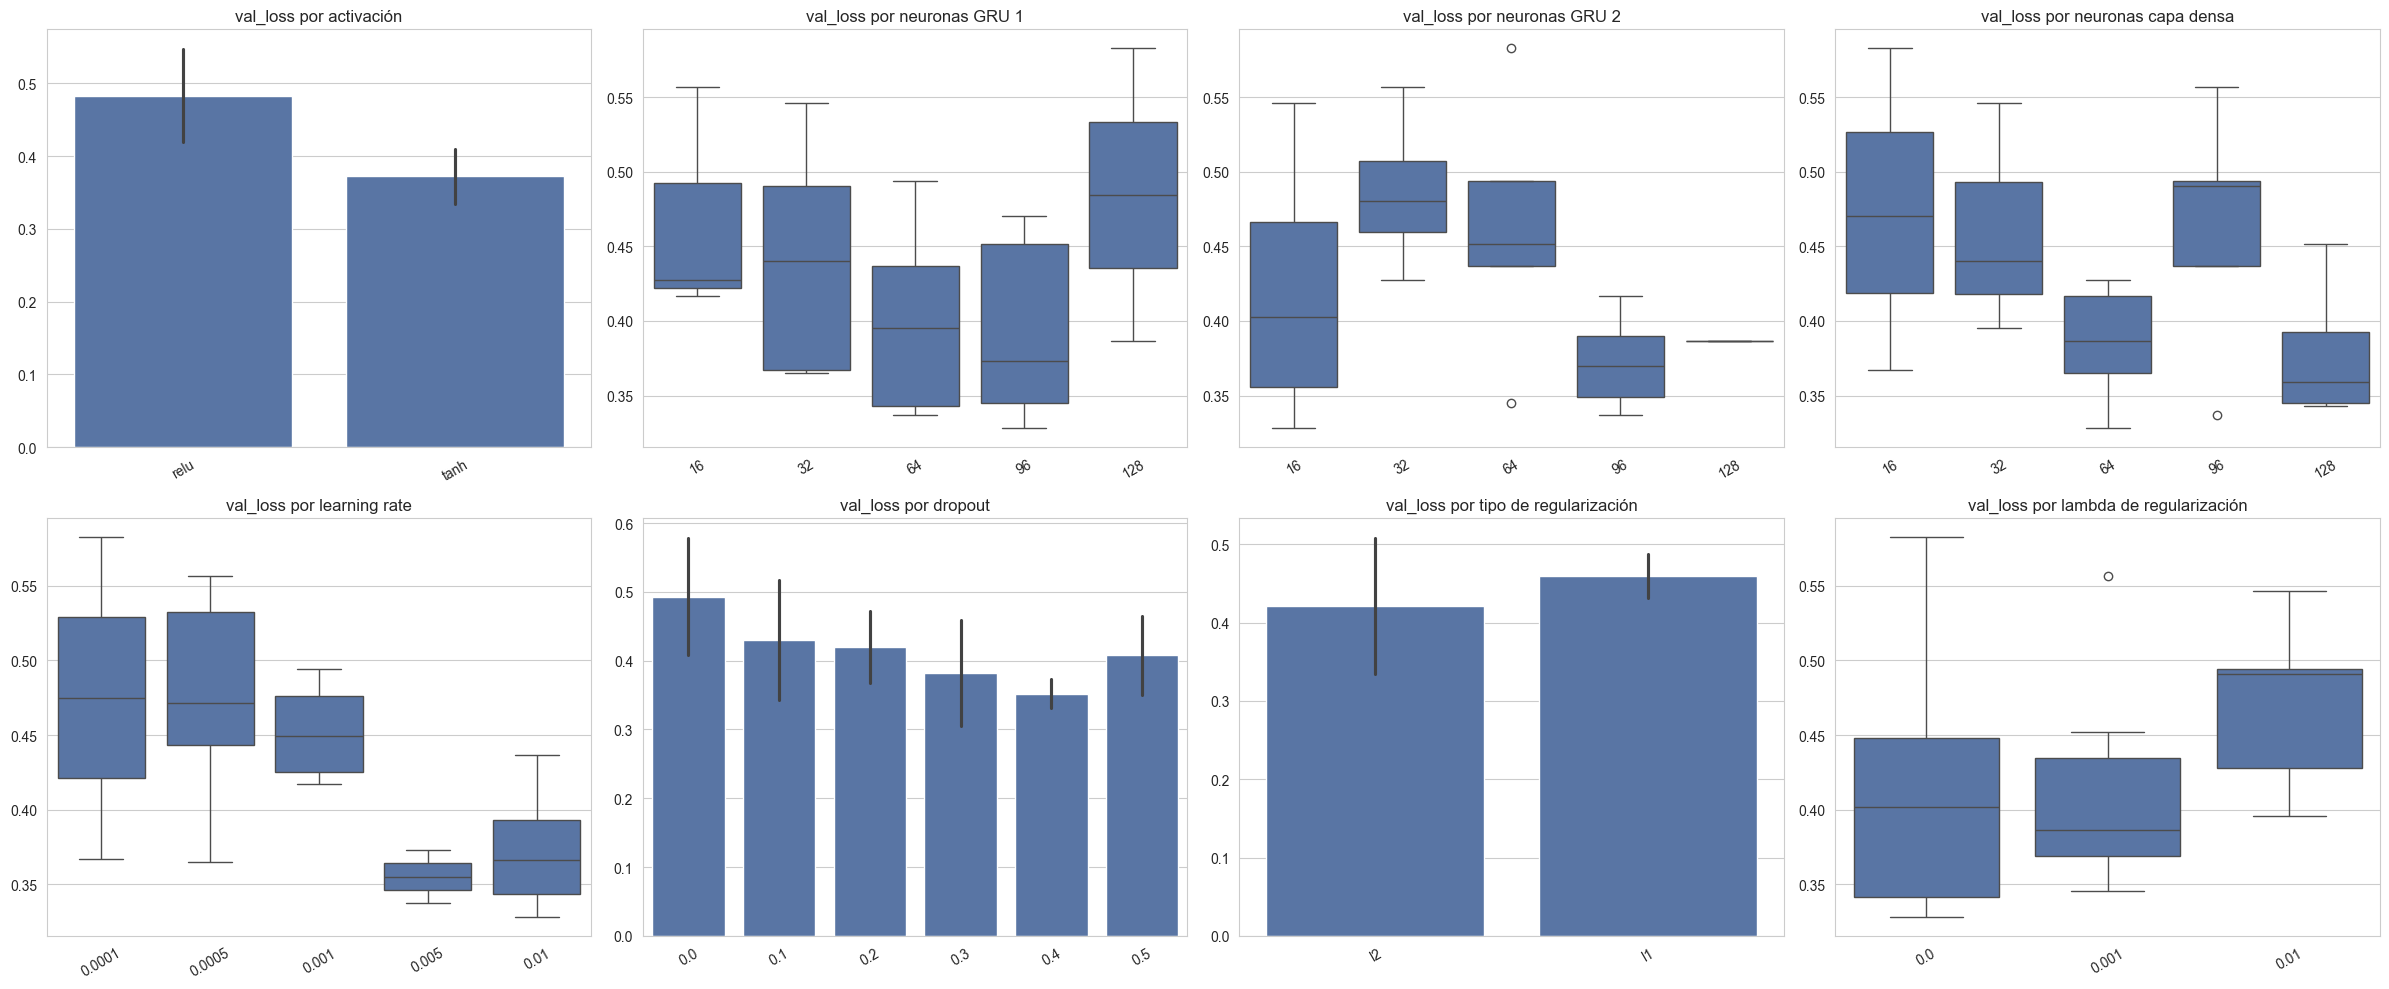

In [ ]:
# Ordenar resultados por error de validación
sorted_results = sorted(results_gru, key=lambda x: x['val_loss'])

# Mostrar los mejores modelos
print("Top 5 mejores modelos (por val_loss):\n")
for i, res in enumerate(sorted_results[:5]):
    print(f"Modelo {i+1}")
    print(f"  - Activación: {res['activation']}")
    print(f"  - GRU units: {res['gru_units']}")
    print(f"  - Dense units: {res['dense_units']}")
    print(f"  - LR: {res['learning_rate']}")
    print(f"  - Dropout: {res['dropout_rate']}")
    print(f"  - Reg: {res['regularizer_type']} (λ={res['regularizer_lambda']})")
    print(f"  - Val loss: {res['val_loss']:.4f}")
    print(f"  - Test loss: {res['test_loss']:.4f}")
    print(f"  - Test loss original: {res['test_loss_original']:.4f}")
    print("-" * 50)

# Analizar tendencias por hiperparámetro
df_results = pd.DataFrame(results_gru)

# Separar gru_units[0] y gru_units[1] en columnas propias
df_results['gru_1'] = df_results['gru_units'].apply(lambda x: x[0])
df_results['gru_2'] = df_results['gru_units'].apply(lambda x: x[1])

fig, axes = plt.subplots(2, 4, figsize=(24, 10))  # 2 filas, 4 columnas

# Acceso plano a los ejes
axes = axes.flatten()

# Gráfico 1: Activación
sns.barplot(data=df_results, x='activation', y='val_loss', ax=axes[0], errorbar='sd')
axes[0].set_title('val_loss por activación')
axes[0].set_ylabel('val_loss (MSE)')

# Gráfico 2: GRU capa 1
sns.boxplot(data=df_results, x='gru_1', y='val_loss', ax=axes[1])
axes[1].set_title('val_loss por neuronas GRU 1')

# Gráfico 3: GRU capa 2
sns.boxplot(data=df_results, x='gru_2', y='val_loss', ax=axes[2])
axes[2].set_title('val_loss por neuronas GRU 2')

# Gráfico 4: Capa densa
sns.boxplot(data=df_results, x='dense_units', y='val_loss', ax=axes[3])
axes[3].set_title('val_loss por neuronas capa densa')

# Gráfico 5: Learning rate
sns.boxplot(data=df_results, x='learning_rate', y='val_loss', ax=axes[4])
axes[4].set_title('val_loss por learning rate')

# Gráfico 6: Dropout
sns.barplot(data=df_results, x='dropout_rate', y='val_loss', ax=axes[5], errorbar='sd')
axes[5].set_title('val_loss por dropout')

# Gráfico 7: Regularizador
sns.barplot(data=df_results, x='regularizer_type', y='val_loss', ax=axes[6], errorbar='sd')
axes[6].set_title('val_loss por tipo de regularización')

# Gráfico 8: Lambda
sns.boxplot(data=df_results, x='regularizer_lambda', y='val_loss', ax=axes[7])
axes[7].set_title('val_loss por lambda de regularización')

# Ajuste final
for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()

### 1.d.5 (5 pts)  Visualice el proceso de entrenamiento del mejor modelo encontrado.

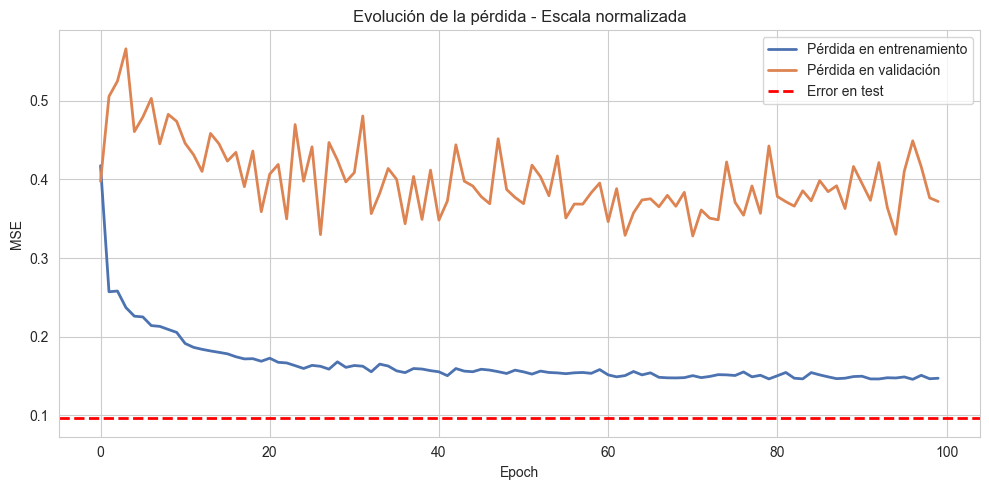

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


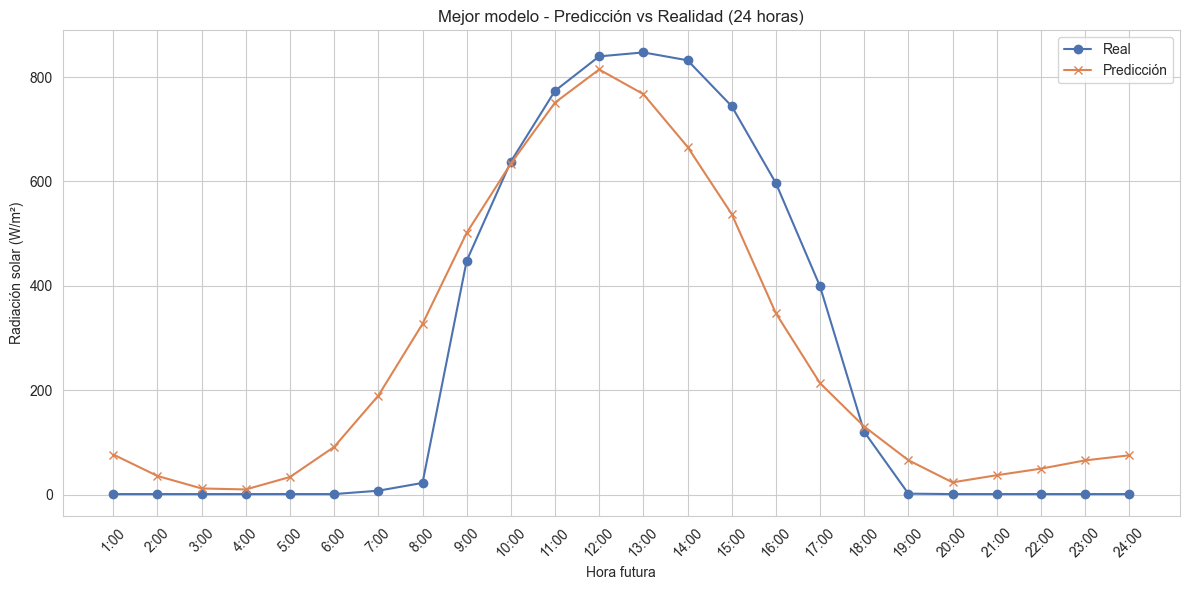

     Hora  Radiación real  Radiación predicha
0    1:00            1.24           76.980003
1    2:00            1.25           35.900002
2    3:00            1.25           12.000000
3    4:00            1.24           10.130000
4    5:00            1.26           33.959999
5    6:00            1.24           91.599998
6    7:00            7.71          189.809998
7    8:00           22.60          327.119995
8    9:00          448.04          501.519989
9   10:00          638.02          634.159973
10  11:00          773.58          751.049988
11  12:00          839.53          814.419983
12  13:00          847.11          767.229980
13  14:00          832.06          666.299988
14  15:00          744.19          537.590027
15  16:00          596.93          347.600006
16  17:00          399.01          213.619995
17  18:00          120.50          130.669998
18  19:00            2.03           66.110001
19  20:00            1.26           23.650000
20  21:00            1.24         

In [ ]:
# Obtener el historial del mejor modelo
history = best_params_gru['history'].history

# Graficar evolución de loss y val_loss
test_loss = best_params_gru['test_loss']

plt.figure(figsize=(10, 5))
plt.plot(history['loss'], label='Pérdida en entrenamiento', linewidth=2)
plt.plot(history['val_loss'], label='Pérdida en validación', linewidth=2)
plt.axhline(y=test_loss, color='red', linestyle='--', label='Error en test', linewidth=2)

plt.title('Evolución de la pérdida - Escala normalizada')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Obtener predicciones en escala normalizada
y_pred_best_scaled = best_model_gru.predict(X_test_seq)

y_pred_best = scaler_y.inverse_transform(y_pred_best_scaled)
y_test_real = scaler_y.inverse_transform(y_test_seq)

# Elegir la muestra a visualizar
i = 10

# Datos reales y predichos para esa muestra
pred = y_pred_best[i]
real = y_test_real[i]

horas = [f'{h}:00' for h in range(1, 25)]

plt.figure(figsize=(12, 6))
plt.plot(horas, real, label='Real', marker='o')
plt.plot(horas, pred, label='Predicción', marker='x')
plt.title('Mejor modelo - Predicción vs Realidad (24 horas)')
plt.xlabel('Hora futura')
plt.ylabel('Radiación solar (W/m²)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Tabla comparativa
df_comparacion = pd.DataFrame({
    'Hora': horas,
    'Radiación real': np.round(real, 2),
    'Radiación predicha': np.round(pred, 2)
})
print(df_comparacion)

### **Conclusiones**

Ambos modelos lograron resultados aceptables en test, siendo el modelo GRU ligeramente superior en términos de error. Esto sugiere que las redes GRU podrían adaptarse mejor a la dinámica temporal específica de este problema, aunque también es posible que se haya beneficiado de una mejor combinación de hiperparámetros.

En general, la pérdida en entrenamiento disminuyó progresivamente, lo que indica que el modelo es capaz de ajustarse a los datos. Sin embargo, la pérdida en validación se mantuvo alta y con alta varianza, lo que sugiere sobreajuste o una dificultad del modelo para capturar patrones generalizables. Esto podría estar asociado a una arquitectura no óptima, a la presencia de ruido en los datos o a una partición de validación poco representativa.

A pesar del mal comportamiento en validación, varios modelos lograron un buen desempeño en el conjunto de test. Esto puede deberse a una mayor similitud entre los conjuntos de entrenamiento y test, o bien a que la validación esté capturando escenarios más desafiantes. De cualquier forma, el bajo error en test sugiere que la red logra extraer representaciones útiles, aunque con margen de mejora en su capacidad de generalización.

Finalmente, durante los experimentos, se observaron comportamientos inestables con tasas de aprendizaje altas, como 0.1 (predeterminada), lo cual en algunos casos condujo a valores NaN durante el entrenamiento, que interpretamos como síntoma de explosión de gradientes. Esto evidencia que la red es sensible a este parámetro y que conviene acotar su búsqueda a valores más pequeños. Vale la pena evaluar el desempeño del modelo con ReduceLROnPlateau para mejorar la estabilidad durante el entrenamiento.